# Solution - 2 (Assignment-2)
### Created by Akash Bhardwaj

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn import metrics
%matplotlib inline

In [2]:
# To load the training data
pr_train_data = pd.read_csv('problem_2_train.csv')

#### Data Analysis

In [3]:
pr_train_data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [4]:
pr_train_data.shape

(6250, 16)

In [5]:
pr_train_data.describe()

,srno,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,tat_in_days
count,6.250000e+03,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000
mean,2.946134e+06,11.732000,340546.139840,232.654400,231.495360,155.040480,366009.473440,4457.158080,12.730400
std,7.733480e+04,9.141463,213449.097822,30.471658,22.521945,41.883918,210990.167946,200.945634,5.075533
min,2.818359e+06,0.000000,0.000000,0.000000,0.000000,131.000000,0.000000,4008.000000,2.000000
25%,2.877226e+06,3.000000,110018.000000,233.000000,233.000000,131.000000,135034.000000,4398.000000,9.000000
50%,2.944426e+06,8.000000,400001.000000,233.000000,233.000000,131.000000,395001.500000,4474.000000,12.000000
75%,3.012237e+06,21.000000,500004.000000,233.000000,233.000000,131.000000,560016.000000,4580.000000,15.000000
max,3.101035e+06,27.000000,800001.000000,308.000000,245.000000,228.000000,855107.000000,5146.000000,57.000000


In [6]:
# To check if there is null value in dataset
pr_train_data.isnull().sum()

srno                   0
mobmake                0
hubid                  0
hubpincode             0
pickuppartnerid        0
deliverypartnerid      0
insuranceCompanyId     0
custpincodecategory    0
claimtype              0
custpincode            0
memcreateddate         0
mobilepurchasedate     0
claimintdate           0
servicecntrid          0
pickupStartdate        0
tat_in_days            0
dtype: int64

In [7]:
# To check the unique values in 'mobmake' column
pr_train_data.mobmake.unique()

array(['AN', 'AJ', 'AM', 'C', 'AI', 'AD', 'S', 'AA', 'Y', 'AE', 'D', 'U',
       'AB', 'T', 'AF', 'G', 'L', 'H', 'K', 'J', 'N', 'AP', 'AK', 'O',
       'F', 'AL', 'R', 'M', 'Z', 'P', 'I', 'V', 'AR', 'W', 'AG', 'B', 'A',
       'AO'], dtype=object)

In [8]:
# To convert the object values of 'mobmake' in numeric
arr=pr_train_data.mobmake.unique()
dict_data={}
for i in range(0,len(arr),1):
    if arr[i] not in dict_data:
        dict_data[arr[i]]=i+1

In [9]:
pr_train_data['mobmake']=pr_train_data.mobmake.map(dict_data)

In [10]:
# To check the unique values in 'custpincodecategory' column
pr_train_data.custpincodecategory.unique()

array(['A', 'B', 'C', '0', 'D'], dtype=object)

In [11]:
# To convert the object values of 'custpincodecategory' in numeric
pr_train_data['custpincodecategory']=pr_train_data.custpincodecategory.map({'A':1,'B':2,'C':3,'D':4,'0':5})

In [12]:
# To check the unique values in 'claimtype' column
pr_train_data.claimtype.unique()

array(['ADLD', 'EW'], dtype=object)

In [13]:
# To convert the object values of 'claimtype' in numeric
pr_train_data['claimtype']=pr_train_data.claimtype.map({'ADLD':1,'EW':2})

In [14]:
pr_train_data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,1,7,500004,233,233,131,1,1,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,2,10,226010,233,233,131,1,1,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,2,2,110018,233,233,228,1,1,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,3,2,110018,233,233,228,2,1,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,1,21,110015,233,233,131,1,1,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [15]:
# To convert the date (memcreatedate) into days, month, year
arr=list(pr_train_data.memcreateddate)
year=[]
mon=[]
day=[]
for a in arr:
    yr,mn,dy=a.split('-')
    year.append(int(yr))
    mon.append(int(mn))
    day.append(int(dy))
pr_train_data['memcreate_year']=year
pr_train_data['memcreate_mon']=mon
pr_train_data['memcreate_day']=day

In [16]:
# To convert the date (mobilepurchasedate) into days, month, year
arr=list(pr_train_data.mobilepurchasedate)
year=[]
mon=[]
day=[]
for a in arr:
    yr,mn,dy=a.split('-')
    year.append(int(yr))
    mon.append(int(mn))
    day.append(int(dy))
pr_train_data['purchase_year']=year
pr_train_data['purchase_mon']=mon
pr_train_data['purchase_day']=day

In [17]:
# To convert the date (claimintdate) into days, month, year
arr=list(pr_train_data.claimintdate)
year=[]
mon=[]
day=[]
for a in arr:
    yr,mn,dy=a.split('-')
    year.append(int(yr))
    mon.append(int(mn))
    day.append(int(dy))
pr_train_data['claimint_year']=year
pr_train_data['claimint_mon']=mon
pr_train_data['claimint_day']=day

In [18]:
# To convert the date (pickupStartdate) into days, month, year
arr=list(pr_train_data.pickupStartdate)
year=[]
mon=[]
day=[]
for a in arr:
    yr,mn,dy=a.split('-')
    year.append(yr)
    mon.append(mn)
    day.append(dy)
pr_train_data['pickup_year']=year
pr_train_data['pickup_mon']=mon
pr_train_data['pickup_day']=day

In [19]:
# After adding new columns 
pr_train_data.columns

Index(['srno', 'mobmake', 'hubid', 'hubpincode', 'pickuppartnerid',
       'deliverypartnerid', 'insuranceCompanyId', 'custpincodecategory',
       'claimtype', 'custpincode', 'memcreateddate', 'mobilepurchasedate',
       'claimintdate', 'servicecntrid', 'pickupStartdate', 'tat_in_days',
       'memcreate_year', 'memcreate_mon', 'memcreate_day', 'purchase_year',
       'purchase_mon', 'purchase_day', 'claimint_year', 'claimint_mon',
       'claimint_day', 'pickup_year', 'pickup_mon', 'pickup_day'],
      dtype='object')

In [20]:
# Dropping the columns ('memcreateddate','mobilepurchasedate','claimintdate','pickupStartdate') 
# because we added new columns above instead of these
pr_train_data.drop(['memcreateddate','mobilepurchasedate','claimintdate','pickupStartdate'],axis=1,inplace=True)

In [21]:
pr_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6250 entries, 0 to 6249
Data columns (total 24 columns):
srno                   6250 non-null int64
mobmake                6250 non-null int64
hubid                  6250 non-null int64
hubpincode             6250 non-null int64
pickuppartnerid        6250 non-null int64
deliverypartnerid      6250 non-null int64
insuranceCompanyId     6250 non-null int64
custpincodecategory    6250 non-null int64
claimtype              6250 non-null int64
custpincode            6250 non-null int64
servicecntrid          6250 non-null int64
tat_in_days            6250 non-null int64
memcreate_year         6250 non-null int64
memcreate_mon          6250 non-null int64
memcreate_day          6250 non-null int64
purchase_year          6250 non-null int64
purchase_mon           6250 non-null int64
purchase_day           6250 non-null int64
claimint_year          6250 non-null int64
claimint_mon           6250 non-null int64
claimint_day           6250 non-n

#### Data Visualization

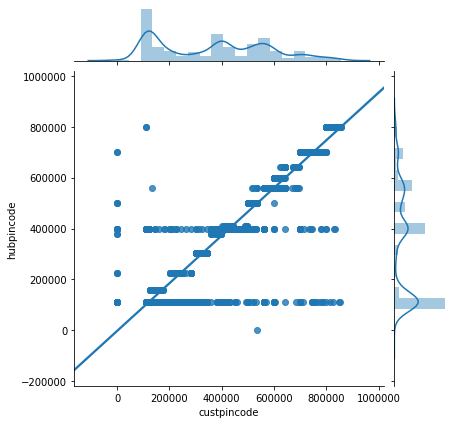

In [22]:
# To find the correlation
sb.jointplot("custpincode", "hubpincode", data=pr_train_data, kind="reg")

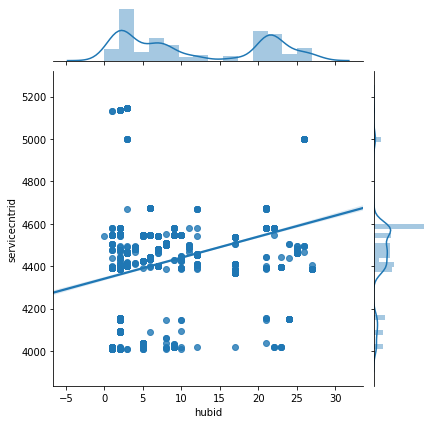

In [23]:
sb.jointplot("hubid", "servicecntrid", data=pr_train_data, kind="reg")

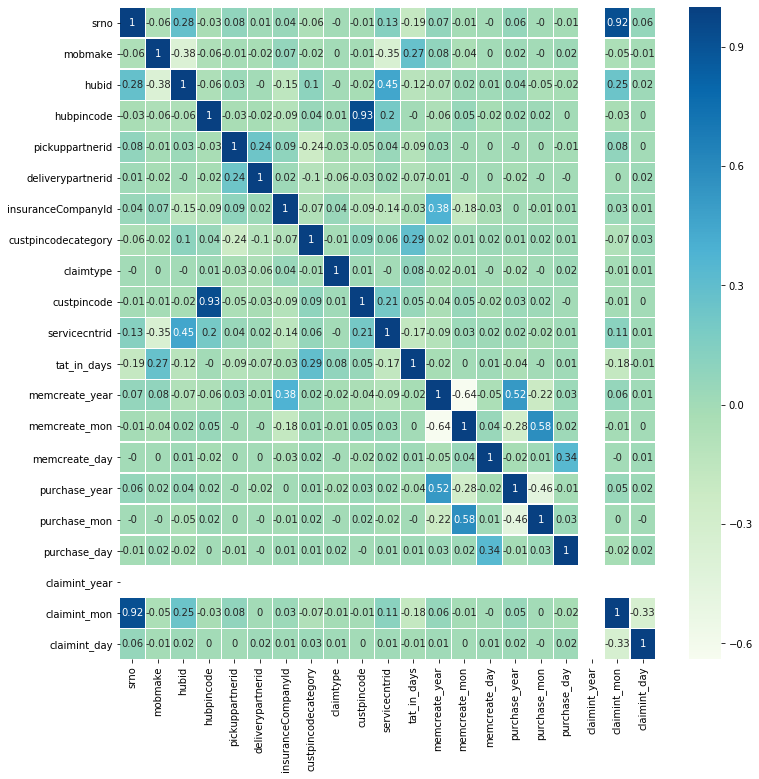

In [24]:
plt.figure(figsize=(12, 12))
correlation_matrix = pr_train_data.corr().round(2)
sb.heatmap(data=correlation_matrix,linewidths=.3,cmap='GnBu', annot=True)

#### Above heatmap shows the correlation:
##### Correlation between:-
##### i) (custpincode and hubpincode),
##### ii) (purchase_mon and memcreate_mon) and
##### iii) (purchase_year and memcreate_year)

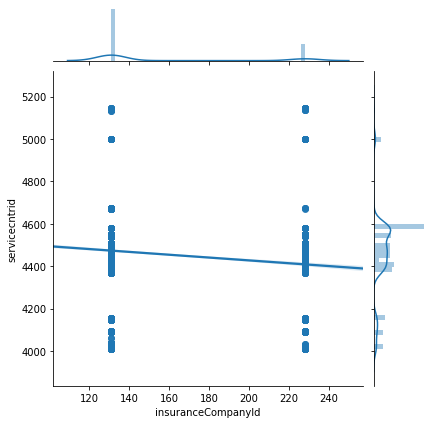

In [25]:
sb.jointplot("insuranceCompanyId", "servicecntrid", data=pr_train_data, kind="reg")

### Applying the ML Algorithm

#### i) Linear Regression

In [26]:
feature_cols=['srno','mobmake','hubid','hubpincode','pickuppartnerid','deliverypartnerid','insuranceCompanyId','custpincodecategory','claimtype','custpincode','servicecntrid','memcreate_year','memcreate_mon','memcreate_day','purchase_year','purchase_mon','purchase_day','claimint_year','claimint_mon','claimint_day','pickup_year','pickup_mon','pickup_day']
X=pr_train_data[feature_cols]
X.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,...,memcreate_day,purchase_year,purchase_mon,purchase_day,claimint_year,claimint_mon,claimint_day,pickup_year,pickup_mon,pickup_day
0,2851218,1,7,500004,233,233,131,1,1,500001,...,27,2016,12,2,2018,2,8,2018,02,13
1,2838330,2,10,226010,233,233,131,1,1,226022,...,6,2017,3,5,2018,2,4,2018,02,08
2,2835781,2,2,110018,233,233,228,1,1,110018,...,1,2018,1,27,2018,2,3,2018,02,12
3,2838589,3,2,110018,233,233,228,2,1,124001,...,17,2018,1,31,2018,2,4,2018,02,14
4,2855214,1,21,110015,233,233,131,1,1,201301,...,23,2018,1,20,2018,2,9,2018,02,14


In [27]:
y=pr_train_data['tat_in_days']

In [28]:
#splitting the training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [29]:
# scaling of features
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [30]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print(linreg.intercept_)
print(linreg.coef_)

12.679965863025412
[-8.02515521  1.14253843  0.09527298 -0.94014219  0.03292101 -0.10083014
 -0.12351339  1.33893141  0.44254795  1.05156612 -0.49398043 -0.01093473
  0.03714071  0.1108101  -0.230768   -0.15916976 -0.02049756  0.
  6.77026768  2.61314992  0.          0.86435571  0.33324496]


In [32]:
list(zip(feature_cols,linreg.coef_))

[('srno', -8.02515521300818),
 ('mobmake', 1.14253842550794),
 ('hubid', 0.09527297697641501),
 ('hubpincode', -0.9401421940937117),
 ('pickuppartnerid', 0.032921013296802915),
 ('deliverypartnerid', -0.10083013756133424),
 ('insuranceCompanyId', -0.12351339073521302),
 ('custpincodecategory', 1.3389314144405502),
 ('claimtype', 0.4425479520793968),
 ('custpincode', 1.051566119366478),
 ('servicecntrid', -0.49398043054120555),
 ('memcreate_year', -0.010934730427983319),
 ('memcreate_mon', 0.03714071334860107),
 ('memcreate_day', 0.11081010372564866),
 ('purchase_year', -0.23076800417801693),
 ('purchase_mon', -0.15916976115580844),
 ('purchase_day', -0.020497564089678545),
 ('claimint_year', 0.0),
 ('claimint_mon', 6.770267684073572),
 ('claimint_day', 2.613149921746824),
 ('pickup_year', 0.0),
 ('pickup_mon', 0.8643557145893381),
 ('pickup_day', 0.33324496120254465)]

In [33]:
y_pred=linreg.predict(X_test)

In [34]:
import numpy as np
from sklearn import metrics
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE: 4.713373019975895


##### Linear Regression (by changing feature columns)

In [35]:
feature_cols=['srno','mobmake','hubid','hubpincode','pickuppartnerid','deliverypartnerid','insuranceCompanyId','custpincodecategory','claimtype','custpincode','servicecntrid','memcreate_year','memcreate_mon','memcreate_day','purchase_year','purchase_mon','claimint_mon','claimint_day','pickup_mon','pickup_day']
X=pr_train_data[feature_cols]
X.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,servicecntrid,memcreate_year,memcreate_mon,memcreate_day,purchase_year,purchase_mon,claimint_mon,claimint_day,pickup_mon,pickup_day
0,2851218,1,7,500004,233,233,131,1,1,500001,4403,2017,4,27,2016,12,2,8,02,13
1,2838330,2,10,226010,233,233,131,1,1,226022,4444,2017,3,6,2017,3,2,4,02,08
2,2835781,2,2,110018,233,233,228,1,1,110018,4388,2018,2,1,2018,1,2,3,02,12
3,2838589,3,2,110018,233,233,228,2,1,124001,4092,2018,1,17,2018,1,2,4,02,14
4,2855214,1,21,110015,233,233,131,1,1,201301,4580,2018,1,23,2018,1,2,9,02,14


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [37]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_pred=linreg.predict(X_test)

In [39]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE: 4.713227784993536


#### ii) Decision Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [41]:
y_pred = dtr.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error 
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE: 6.259733303941018


#### iii) Random Forest

In [43]:
# Fitting Random Forest Regression to the Training set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)

In [44]:
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [45]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [46]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE: 4.500638413518536


#### iv) Gradient Boost

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

In [48]:
greg = GradientBoostingRegressor()
greg.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
y_pred = greg.predict(X_test)

In [50]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE: 4.41166703446011


### we have identified that Gradient Boost model gives less RMSE so that we are using Gradient Boost

In [51]:
feature_cols=['srno','mobmake','hubid','hubpincode','pickuppartnerid','deliverypartnerid','insuranceCompanyId','custpincodecategory','claimtype','custpincode','servicecntrid','memcreate_year','memcreate_mon','memcreate_day','purchase_year','purchase_mon','claimint_mon','claimint_day','pickup_mon','pickup_day']
X=pr_train_data[feature_cols]
X.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,servicecntrid,memcreate_year,memcreate_mon,memcreate_day,purchase_year,purchase_mon,claimint_mon,claimint_day,pickup_mon,pickup_day
0,2851218,1,7,500004,233,233,131,1,1,500001,4403,2017,4,27,2016,12,2,8,02,13
1,2838330,2,10,226010,233,233,131,1,1,226022,4444,2017,3,6,2017,3,2,4,02,08
2,2835781,2,2,110018,233,233,228,1,1,110018,4388,2018,2,1,2018,1,2,3,02,12
3,2838589,3,2,110018,233,233,228,2,1,124001,4092,2018,1,17,2018,1,2,4,02,14
4,2855214,1,21,110015,233,233,131,1,1,201301,4580,2018,1,23,2018,1,2,9,02,14


In [52]:
y=pr_train_data['tat_in_days']

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
greg = GradientBoostingRegressor()
greg.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### To insert the dataset (predicted) values according to Gradient Boost model

In [54]:
# To load the test data file
test_data=pd.read_csv('problem_2_test.csv')

In [55]:
# To check the unique values in 'mobmake' column
test_data.mobmake.unique()

array(['AN', 'AJ', 'C', 'U', 'J', 'H', 'AD', 'AF', 'AI', 'D', 'S', 'AE',
       'AM', 'Y', 'AA', 'AB', 'G', 'F', 'Z', 'L', 'R', 'A', 'AH', 'AK',
       'O', 'Q', 'K', 'W', 'I', 'AC', 'T', 'AR', 'P', 'AG'], dtype=object)

In [56]:
mobmake = test_data.mobmake

In [57]:
# To convert the object values of 'mobmake' in numeric
arr=test_data.mobmake.unique()
dict_data={}
for i in range(0,len(arr),1):
    if arr[i] not in dict_data:
        dict_data[arr[i]]=i+1

In [58]:
test_data['mobmake']=test_data.mobmake.map(dict_data)

In [59]:
# To check the unique values in 'custpincodecategory' column
test_data.custpincodecategory.unique()

array(['A', 'C', 'B', 'D', '0'], dtype=object)

In [60]:
# To convert the object values of 'custpincodecategory' in numeric
test_data['custpincodecategory']=test_data.custpincodecategory.map({'A':1,'B':2,'C':3,'D':4,'0':5})

In [61]:
# To check the unique values in 'claimtype' column
test_data.claimtype.unique()

array(['ADLD', 'EW'], dtype=object)

In [62]:
# To convert the object values of 'claimtype' in numeric
test_data['claimtype']=test_data.claimtype.map({'ADLD':1,'EW':2})

In [63]:
test_data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate
0,2829088,1,3,560011,233,233,131,1,1,560093,2017-07-30,2017-07-27,2018-02-01,4467,2018-02-06
1,2829866,2,2,110018,233,233,228,1,1,110034,2017-07-17,2017-01-25,2018-02-01,4388,2018-02-08
2,2894489,2,3,560011,233,233,228,3,1,590014,2018-01-12,2018-01-11,2018-02-21,4460,2018-02-28
3,2876708,2,2,110018,233,233,228,2,1,250110,2017-08-07,2017-05-21,2018-02-16,4388,2018-02-26
4,2890283,1,22,400104,233,233,131,3,1,496001,2017-11-10,2017-09-22,2018-02-20,4581,2018-02-23


In [64]:
# To convert the date (memcreatedate) into days, month, year
arr=list(test_data.memcreateddate)
year=[]
mon=[]
day=[]
for a in arr:
    yr,mn,dy=a.split('-')
    year.append(int(yr))
    mon.append(int(mn))
    day.append(int(dy))
test_data['memcreate_year']=year
test_data['memcreate_mon']=mon
test_data['memcreate_day']=day

In [65]:
# To convert the date (mobilepurchasedate) into days, month, year
arr=list(test_data.mobilepurchasedate)
year=[]
mon=[]
day=[]
for a in arr:
    yr,mn,dy=a.split('-')
    year.append(int(yr))
    mon.append(int(mn))
    day.append(int(dy))
test_data['purchase_year']=year
test_data['purchase_mon']=mon
test_data['purchase_day']=day

In [66]:
# To convert the date (claimintdate) into days, month, year
arr=list(test_data.claimintdate)
year=[]
mon=[]
day=[]
for a in arr:
    yr,mn,dy=a.split('-')
    year.append(int(yr))
    mon.append(int(mn))
    day.append(int(dy))
test_data['claimint_year']=year
test_data['claimint_mon']=mon
test_data['claimint_day']=day

In [67]:
# To convert the date (pickupStartdate) into days, month, year
arr=list(test_data.pickupStartdate)
year=[]
mon=[]
day=[]
for a in arr:
    yr,mn,dy=a.split('-')
    year.append(yr)
    mon.append(mn)
    day.append(dy)
test_data['pickup_year']=year
test_data['pickup_mon']=mon
test_data['pickup_day']=day

In [68]:
test_data.columns

Index(['srno', 'mobmake', 'hubid', 'hubpincode', 'pickuppartnerid',
       'deliverypartnerid', 'insuranceCompanyId', 'custpincodecategory',
       'claimtype', 'custpincode', 'memcreateddate', 'mobilepurchasedate',
       'claimintdate', 'servicecntrid', 'pickupStartdate', 'memcreate_year',
       'memcreate_mon', 'memcreate_day', 'purchase_year', 'purchase_mon',
       'purchase_day', 'claimint_year', 'claimint_mon', 'claimint_day',
       'pickup_year', 'pickup_mon', 'pickup_day'],
      dtype='object')

In [69]:
feature_cols=['srno','mobmake','hubid','hubpincode','pickuppartnerid','deliverypartnerid','insuranceCompanyId','custpincodecategory','claimtype','custpincode','servicecntrid','memcreate_year','memcreate_mon','memcreate_day','purchase_year','purchase_mon','claimint_mon','claimint_day','pickup_mon','pickup_day']
X_test=test_data[feature_cols]

In [70]:
y_pred = greg.predict(X_test)
y_pred

array([ 9.87917496, 11.24865002, 12.25343765, ..., 13.74793962,
       12.42708801, 15.07484097])

In [71]:
test_data.drop(['memcreate_year','memcreate_mon','memcreate_day','purchase_year','purchase_mon','purchase_day','claimint_year','claimint_mon','claimint_day','pickup_year','pickup_mon','pickup_day'],axis=1,inplace=True)

In [72]:
test_data['claimtype']=test_data.claimtype.map({1:'ADLD',2:'EW'})

In [73]:
test_data['custpincodecategory']=test_data.custpincodecategory.map({1:'A',2:'B',3:'C',4:'D',5:'0'})

In [74]:
test_data['mobmake']=mobmake

In [75]:
test_data['Dataset']=y_pred

In [76]:
test_data.to_csv('prob_2_Akash_Bhardwaj_test.csv',index=False)